In [76]:
# first import the necessary libararys
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from numpy import sqrt 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
pip install --upgrade xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv(r"C:\Users\adnan\Downloads\diabetes\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
## get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

Text(0.5, 1.0, 'Distribution of  BIM')

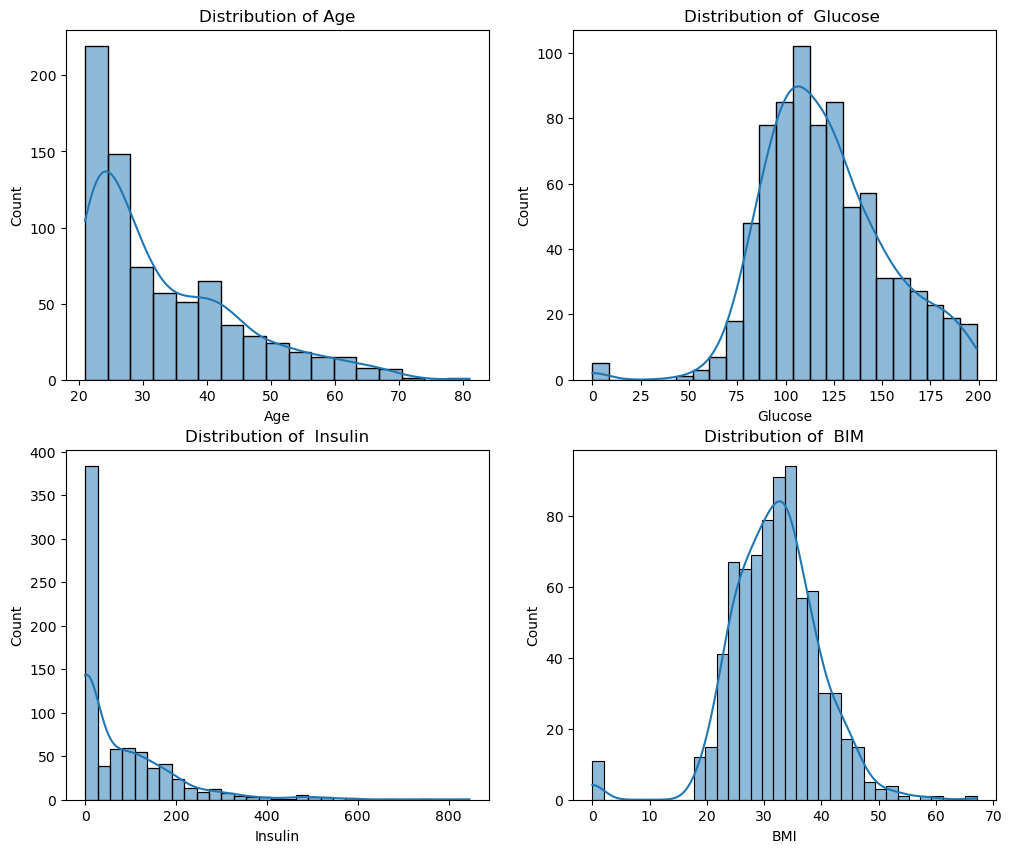

In [8]:
# inspect the distrbution of some features 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df, x='Age', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data=df, x='Glucose', ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of  Glucose ')


sns.histplot(data=df, x='Insulin', ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of  Insulin')


sns.histplot(data=df, x='BMI', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of  BIM')

#### we need to put into our considration that the age feature is right skeewd and also the insulin level

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### we can see that the targetied column is not fully balanced 

we can see that it is clean data since there is no missing values 


### Feature engineering 

#### 1. feature selection

In [16]:
### we need to divid our data 
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']



X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [17]:
### build the model 
model = RandomForestClassifier(random_state=42) 


cv_params = {'max_depth': [None,3,5,7,9,11],
             'max_features': ['sqrt'],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [20,30,50,70,90,100]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf = GridSearchCV(model, cv_params, scoring=scoring, cv=5, refit='f1')

In [18]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 37 s
Wall time: 40.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 7, 9, 11],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [20, 30, 50, 70, 90, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [19]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [20]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [21]:
rf.best_score_

0.6453874410140223

In [22]:
rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [23]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [24]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.695262,0.611829,0.645387,0.767451


In [25]:
# Get scores on test data
rf_preds = rf.best_estimator_.predict(X_test)

In [26]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [27]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.695262,0.611829,0.645387,0.767451
0,RF test,0.698113,0.552239,0.616667,0.760417


###  we will try to improve your scores using an XGBoost model.

In [29]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [6,8,10],
             'min_child_weight': [2],
             'n_estimators': [50,100,150]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')


In [60]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 40.7 s
Wall time: 4.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 8, 10],
                         'min_child_weight': [2],
                         'n_estimators': [50, 100, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [62]:
# Examine best score
xgb1.best_score_

0.638892788236576

In [64]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 50}

In [66]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.695262,0.611829,0.645387,0.767451
0,RF test,0.698113,0.552239,0.616667,0.760417
0,XGB CV,0.655748,0.627059,0.638893,0.753472


In [68]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [70]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.695262,0.611829,0.645387,0.767451
0,RF test,0.698113,0.552239,0.616667,0.760417
0,XGB CV,0.655748,0.627059,0.638893,0.753472
0,XGB test,0.684211,0.582090,0.629032,0.760417


##### we can see the XGB model has better performance in the tested data  than the random forest 

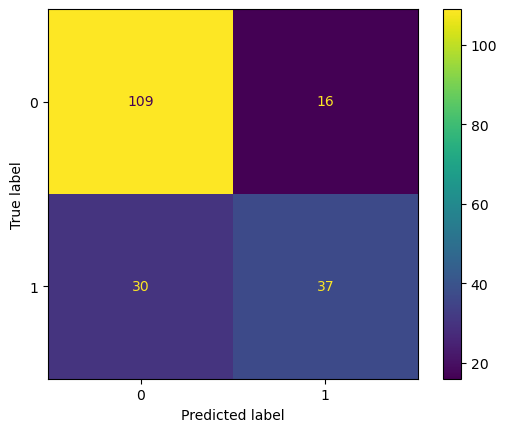

In [80]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_, 
                             )
disp.plot(values_format='');

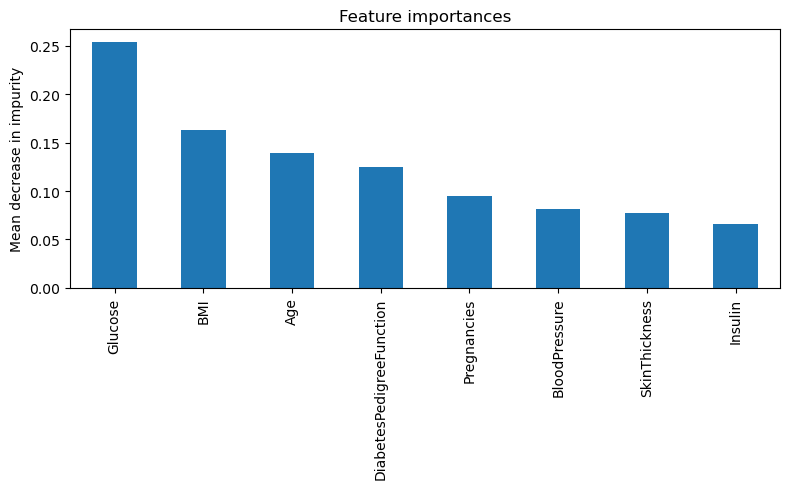

In [82]:
importances = rf.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();